In [1]:
import sys
print(sys.executable)

/opt/anaconda3/envs/compbio/bin/python


In [5]:
from Bio import SeqIO
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import os
import subprocess

In [10]:
os.makedirs("data/raw", exist_ok=True)

# NCBI accession for e. coli reference genome
acc = "NC_000913.3"
output_fasta = "data/raw/ecoli_genome.fasta"

# NCBI download url (FASTA)
url = (
    "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/"
    f"efetch.fcgi?db=nuccore&id={acc}&rettype=fasta&retmode=text"
)

if not os.path.exists(output_fasta):
    subprocess.run(
        ["curl", "-L", "-o", output_fasta, url],
        check=True
    )


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4597k    0 4597k    0     0  5461k      0 --:--:-- --:--:-- --:--:-- 5473k


In [7]:
print("Downloaded:", output_fasta)

Downloaded: data/raw/ecoli_genome.fasta


In [11]:
record = SeqIO.read("data/raw/ecoli_genome.fasta", "fasta")
print("ID:", record.id)
print("Description:", record.description)
print("Genome length:", len(record.seq))

ID: NC_000913.3
Description: NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
Genome length: 4641652


In [17]:
from Bio.SeqUtils import GC
gc = GC(record.seq)
print(f"GC content: {gc:.2f}%")

GC content: 50.79%


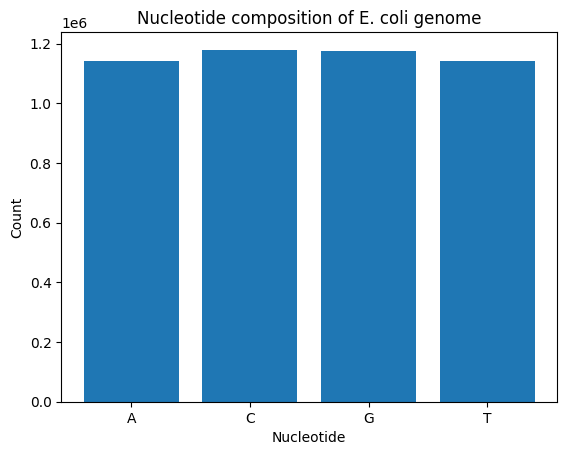

In [18]:
from collections import Counter
seq = str(record.seq).upper()
counts = Counter(seq)

bases = ["A", "C", "G", "T"]
values = [counts[b] for b in bases]

plt.bar(bases, values)
plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.title("Nucleotide composition")
plt.show()

In [4]:
fastq_url = "https://raw.githubusercontent.com/biopython/biopython/master/Tests/Quality/example.fastq"
fastq_path = "data/raw/example.fastq"

if not os.path.exists(fastq_path):
    subprocess.run(
        ["curl", "-L", "-o", fastq_path, fastq_url],
        check=True
    )

print("Downloaded:", fastq_path)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

Downloaded: data/raw/example.fastq


100   234  100   234    0     0    848      0 --:--:-- --:--:-- --:--:--   854


In [6]:
records = list(SeqIO.parse("data/raw/example.fastq", "fastq"))
print("Number of reads:", len(records))

Number of reads: 3


Read ID: EAS54_6_R1_2_1_413_324
Sequence: CCCTTCTTGTCTTCAGCGTTTCTCC
Quality scores: [26, 26, 18, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 22, 26, 26, 26, 26, 26, 26, 26, 23, 23]


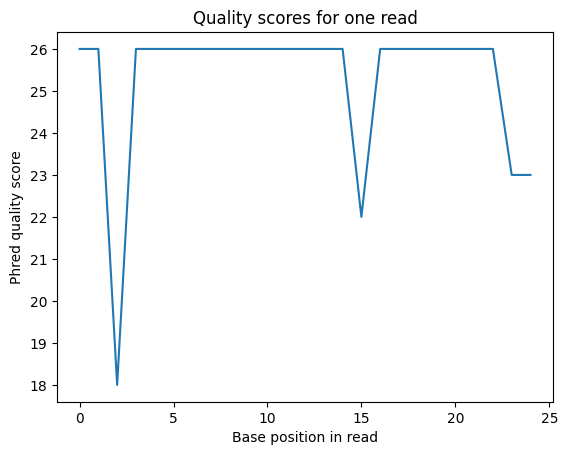

In [9]:
r = records[0]

print("Read ID:", r.id)
print("Sequence:", r.seq)
print("Quality scores:", r.letter_annotations["phred_quality"])

qualities = r.letter_annotations["phred_quality"]

plt.plot(qualities)
plt.xlabel("Base position in read")
plt.ylabel("Phred quality score")
plt.title("Quality scores for one read")
plt.show()

In [11]:
import numpy as np

#  max read length
max_len = max(len(r.seq) for r in records)

# qualities by position
qualities_by_pos = [[] for _ in range(max_len)]

for r in records:
    qs = r.letter_annotations["phred_quality"]
    for i, q in enumerate(qs):
        qualities_by_pos[i].append(q)

mean_q = [np.mean(qs) for qs in qualities_by_pos]


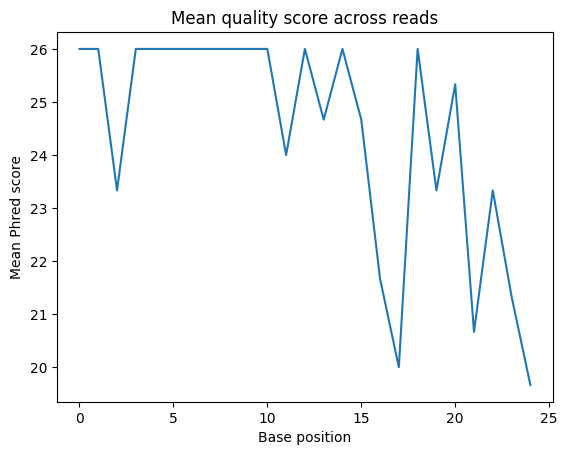

In [12]:
plt.plot(mean_q)
plt.xlabel("Base position")
plt.ylabel("Mean Phred score")
plt.title("Mean quality score across reads")
plt.show()

In [13]:
low_positions = [i for i, q in enumerate(mean_q) if q < 20]
print("Positions with mean Q < 20:", low_positions)

Positions with mean Q < 20: [24]
